In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# loading the data
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [2]:
data['Outcome'] = data['Outcome'].replace([0,1],['non_diabetic', 'Diabetic'])

# Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

In [3]:
# It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

df = data.copy(deep = True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [4]:
# We can fill the null values either with mean or median
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [5]:
df.isnull().sum() #  check the values for each column after filling nan values with mean and median

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

non_diabetic    500
Diabetic        268
Name: Outcome, dtype: int64


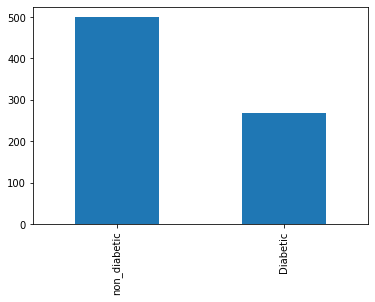

In [6]:
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

From above graph we can conclude that the number of non-diabetics is almost twice the number of diabetic patients

In [7]:
col = df.columns[0:8]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col] = scaler.fit_transform(df[col])

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,Diabetic
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,non_diabetic
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,Diabetic
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,non_diabetic
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,Diabetic


In [16]:
import random
def train_test_split(data, split, train_data = [], test_data = []):
    for x in range(len(data)):
        if random.random() < split:
            train_data.append(data.loc[x])
        else:
            test_data.append(data.loc[x])

In [17]:
train_data = []
test_data = []
split = 0.7
train_test_split(df, split, train_data, test_data)

In [18]:
print(len(train_data))
print(len(test_data))

529
239


In [19]:
#Define Euclidean distances
import math
def Euclideandist(x,xi, length):
    d = 0.0
    for i in range(length):
        d += pow(float(x[i])- float(xi[i]),2)
    return math.sqrt(d)

In [20]:
#Getting the K neighbours having the closest Euclidean distance to the test data
import operator
def getNeighbors(train_data, test_data, k):
    distances = []
    length = len(test_data)-1
    for x in range(len(train_data)):
        dist = Euclideandist(test_data, train_data[x], length)
        distances.append((train_data[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [21]:
#After sorting the neighbours based on their respective classes, max voting to give the final class of the test data
import operator
def getResponse(neighbors):
    Votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in Votes:
            Votes[response] += 1
        else:
            Votes[response] = 1
    sortedVotes = sorted(Votes.items(), key=operator.itemgetter(1), reverse=True)#Sorting it based on votes
    return sortedVotes[0][0] #Please note we need the class for the top voted class, hence [0][0]

In [22]:
#Getting the accuracy
def getAccuracy(test_data, predictions):
    correct = 0
    for x in range(len(test_data)):
        if test_data[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(test_data))) * 100.0

In [23]:
# generate predictions
predictions=[]
k = 3 # hyperparameter
# just to display the output
for x in range(len(test_data)):
    neighbors = getNeighbors(train_data, test_data[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(test_data[x][-1]))

> predicted='non_diabetic', actual='Diabetic'
> predicted='Diabetic', actual='non_diabetic'
> predicted='Diabetic', actual='Diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='Diabetic'
> predicted='non_diabetic', actual='Diabetic'
> predicted='non_diabetic', actual='Diabetic'
> predicted='Diabetic', actual='Diabetic'
> predicted='Diabetic', actual='non_diabetic'
> predicted='Diabetic', actual='Diabetic'
> predicted='Diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='Diabetic'
> predicted='Diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='Diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='Diabetic', actual='non_diabetic'
> predicted='non_d

> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='Diabetic', actual='Diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='Diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='Diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='non_diabetic', actual='non_diabetic'
> predicted='Diabetic', actual='Diabetic'
> predicted='Diabetic', actual='Diabetic'
> predicted='non_diabetic', actu

In [24]:
accuracy = getAccuracy(test_data, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 70.29288702928869%


# KNN using Scikit learn

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Outcome'] = df['Outcome'].replace(['non_diabetic', 'Diabetic'],[0,1]) 
X =  pd.DataFrame(scaler.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [28]:
Y = df['Outcome']

In [29]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=1/3,random_state=42, stratify=Y)

In [31]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

512
256
512
256


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# K-NN model
train_score = []
test_score = []
for i in range(3,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    print('\n****Test accuracy for k = %d is %d%%' % (i,acc))
    test_score.append(knn.score(X_test,y_test))


****Test accuracy for k = 3 is 74%

****Test accuracy for k = 4 is 74%

****Test accuracy for k = 5 is 74%

****Test accuracy for k = 6 is 72%

****Test accuracy for k = 7 is 74%

****Test accuracy for k = 8 is 74%

****Test accuracy for k = 9 is 74%

****Test accuracy for k = 10 is 73%

****Test accuracy for k = 11 is 76%

****Test accuracy for k = 12 is 73%

****Test accuracy for k = 13 is 75%

****Test accuracy for k = 14 is 73%

****Test accuracy for k = 15 is 73%

****Test accuracy for k = 16 is 73%

****Test accuracy for k = 17 is 75%

****Test accuracy for k = 18 is 73%

****Test accuracy for k = 19 is 74%

****Test accuracy for k = 20 is 74%

****Test accuracy for k = 21 is 75%

****Test accuracy for k = 22 is 74%

****Test accuracy for k = 23 is 76%

****Test accuracy for k = 24 is 75%

****Test accuracy for k = 25 is 74%

****Test accuracy for k = 26 is 75%

****Test accuracy for k = 27 is 74%

****Test accuracy for k = 28 is 73%

****Test accuracy for k = 29 is 73%


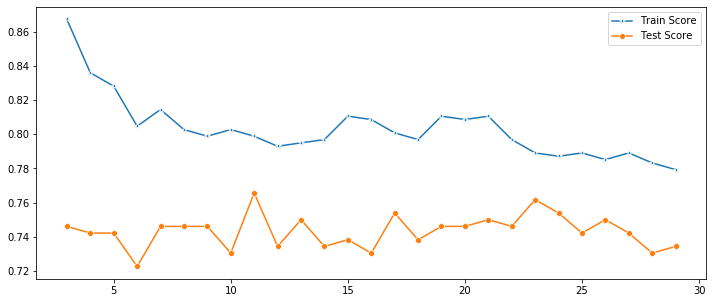

In [33]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(range(3,30),train_score,marker='*',label='Train Score')
p = sns.lineplot(range(3,30),test_score,marker='o',label='Test Score')

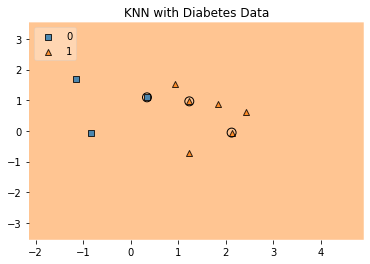

In [141]:
#pip install mlxtend  
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions
value = 20000
width = 20000
plot_decision_regions(X.values, Y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()

# Other Metrics

## 1. Confusion Matrix

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



### ***In the famous cancer example***:


###### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

###### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

###### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

###### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

![](https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg)


In [142]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,146,21,167
1,47,42,89
All,193,63,256


Text(0.5, 24.0, 'Predicted label')

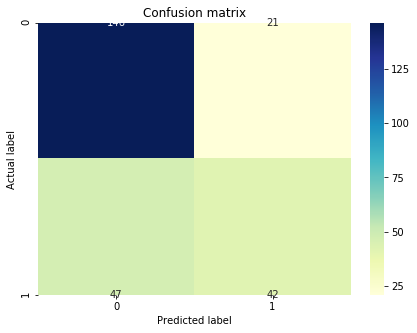

In [150]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Precision Score

TP – True Positives

FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)


# Recall Score

FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    
    Recall = TP/(TP+FN)

# F1 Score

F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.

    F1 Score takes into account precision and the recall.
    
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)


In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       167
           1       0.67      0.47      0.55        89

    accuracy                           0.73       256
   macro avg       0.71      0.67      0.68       256
weighted avg       0.73      0.73      0.72       256

